In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Setup

A study was done to see if different forms of audio would have an effect on the level of pain reported by patients.  The data is made up, but in a way to draw the same conclusions.  Original study can be found [here](https://www.npr.org/sections/health-shots/2015/06/22/415048075/to-ease-pain-reach-for-your-playlist-instead-of-popping-a-pill).

<p align='center'>
    <img width='50%' src='https://whyy.org/wp-content/uploads/2017/07/painscale-768x432.jpg'>
</p>

## Read and Inspect

In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# fmt: off
audio_book = np.array([7.5, 4. , 4. , 3. , 6.5, 1. , 8. , 4. , 5.5, 4.5, 7.5, 1.5, 4.5,
                       4.5, 7. , 3. , 4.5, 3.5, 5. , 6. , 3. , 7. , 6.5, 6. , 6.5, 4. ,
                       5. , 3.5, 4.5, 6. , 4. , 4.5, 4. , 3.5, 4. , 5. , 3. , 5.5, 8. ,
                       6.5, 4.5, 3.5, 4. , 8. , 5. , 4. , 5.5, 8.5, 5. , 6. , 5.5, 4.5,
                       3. , 4.5, 4.5, 6. , 6.5, 6.5, 5.5, 6.5, 4. , 7. , 6. , 4.5, 6. ,
                       5. , 7. , 7.5, 8.5, 2.5, 2.5, 4. , 5.5, 6.5, 5.5, 1.5, 4.5, 6.5,
                       5.5, 6.5, 4.5, 4.5, 5.5, 5.5, 5.5, 5. , 4. , 5.5, 5. , 7. , 7. ,
                       5.5, 4.5, 4. , 5.5, 5. , 4.5, 5. , 4. , 6. ])


control = np.array([ 6. ,  8.5,  7.5,  7.5,  5. ,  7. ,  8. ,  5. ,  6. ,  6.5,  4.5,
                    7. ,  8. ,  5.5,  7.5,  4.5,  6.5,  4. ,  8.5,  7.5,  6.5,  5.5,
                    9. , 10. ,  3.5,  9. ,  9.5,  7.5,  4.5,  8. ,  6.5,  5.5,  4.5,
                    7.5,  8. ,  5.5,  7.5,  5. ,  8. ,  7. ,  6.5,  6.5,  8. ,  8. ,
                    7.5,  7. ,  7. ,  7.5,  7. ,  8. ,  6. ,  2.5,  8.5, 10. ,  7.5,
                    6.5,  6.5,  6.5,  6.5,  5. ,  6. ,  5. ,  7. ,  6. ,  7.5,  6.5,
                    8.5,  7. , 10. ,  3.5,  5.5,  8. , 10. ,  6.5,  7. ,  6.5,  9. ,
                    6. ,  8. ,  6. ,  4.5,  7. ,  7.5,  9. ,  6.5,  5.5,  7.5,  7. ,
                    7. ,  6.5,  8.5,  7.5, 10. ,  8.5,  8. ,  4. ,  7.5,  7.5,  8. ,
                    8.5])


music = np.array([4. , 6. , 3.5, 8. , 2.5, 1.5, 2. , 3. , 3. , 8. , 4. , 2.5, 6.5,
                  3.5, 2.5, 6. , 5.5, 4. , 7. , 5. , 7.5, 5.5, 7. , 5. , 2.5, 8.5,
                  3.5, 4.5, 3.5, 4.5, 5. , 5. , 5.5, 7.5, 4.5, 2.5, 2.5, 3.5, 2. ,
                  6. , 4. , 4. , 4.5, 2.5, 3. , 5.5, 5.5, 4. , 7.5, 2.5, 4. , 4. ,
                  0. , 8. , 5. , 3. , 8. , 5.5, 5.5, 3.5, 5. , 2. , 6. , 4. , 5. ,
                  6.5, 5. , 5. , 5. , 3.5, 6. , 7. , 6. , 6. , 3. , 3. , 2. , 6.5,
                  4. , 7. , 3.5, 4. , 5. , 6. , 4.5, 5. , 4.5, 5. , 3. , 5. , 4.5,
                  4.5, 5.5, 3.5, 4.5, 4. , 5.5, 6. , 3. , 5.5])
# fmt: on

pain = pd.DataFrame({"audio_book": audio_book, "music": music, "control": control,})

display(pain.head())
print(pain.mean())

,audio_book,music,control
0,7.5,4.0,6.0
1,4.0,6.0,8.5
2,4.0,3.5,7.5
3,3.0,8.0,7.5
4,6.5,2.5,5.0


audio_book    5.115
music         4.630
control       6.925
dtype: float64


<IPython.core.display.Javascript object>

This data frame has a little different format than we've been using.  It might be just fine to continue with the analysis as is, but for extra practice, let's reformat this data to be taller.

Reformat the data to have 2 columns, `'treatment'` & `'pain'`, where `'treatment'` holds the value of `['audio_book', 'music', 'control']` & `'pain'` holds the score.

In [3]:
tall_pain = pd.melt(pain, var_name="treatment", value_name="pain")
tall_pain

,treatment,pain
0,audio_book,7.5
1,audio_book,4.0
2,audio_book,4.0
3,audio_book,3.0
4,audio_book,6.5
...,...,...
295,control,4.0
296,control,7.5
297,control,7.5
298,control,8.0


<IPython.core.display.Javascript object>

Visualize the data by group somehow, which treatment group(s) appear to be the most effective at reducing pain?  Which appear to be the least effective?

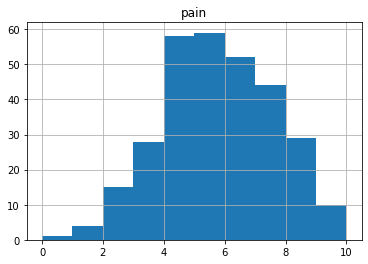

<IPython.core.display.Javascript object>

In [4]:
tall_pain.hist()
plt.show()

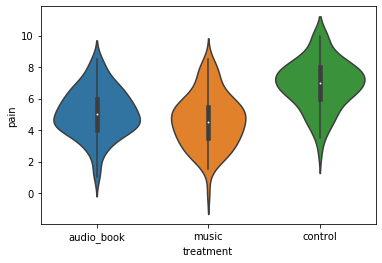

<IPython.core.display.Javascript object>

In [5]:
sns.violinplot(x="treatment", y="pain", data=tall_pain)

# other options
# sns.swarmplot(x="treatment", y="pain", data=tall_pain)
# sns.boxplot(x="treatment", y="pain", data=tall_pain)
plt.show()

## ANOVA Assumptions

From wikipedia:

> * Response variable residuals are normally distributed (or approximately normally distributed).
> * Variances of populations are equal.
> * Responses for a given group are independent and identically distributed normal random variables.

### Normality!

As pointed out by this [StackExchange question](https://stats.stackexchange.com/q/60410/102646), this assumption isn't the most clearly communicated thing across the internet.

[This resource](https://www.theanalysisfactor.com/checking-normality-anova-model/) lays out a nice summary to hopefully clear up some confusion.

> The normality assumption is that residuals follow a normal distribution.
>
> ...
>
> But what it’s really getting at is the distribution of Y|X.   That’s Y given the value of X.  Because X values are considered fixed, they have no distributions.  Residuals have the same distribution as Y|X.  If residuals are normally distributed, it means that Y is normally distributed within a value of X (not necessarily overall).
>
> ...
>
> But when predictors are categorical, there are usually just a few values of X (the categories), and there are many observations at each value of X.  So you’ll often see the normality assumption for an ANOVA stated as:
>
> “The distribution of Y within each group is normally distributed.”  It’s the same thing as Y|X and in this context, it’s the same as saying the residuals are normally distributed.
>
> ...
>
> So in ANOVA, you actually have two options for testing normality.  If there really are many values of Y for each value of X (each group), and there really are only a few groups (say, four or fewer), go ahead and check normality separately for each group.
>
> But if you have many groups (a 2x2x3 ANOVA has 12 groups) or if there are few observations per group (it’s hard to check normality on only 20 data points), it’s often easier to just use the residuals and check them all together.

In this notebook, let's check both ways.

#### Shapiro-Wilk

From [`scipy.stats.shapiro` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html):

> The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

* $H_o$: data was drawn from a normal distribution
* $H_a$: data was not drawn from a normal distribution

You'll often see it noted that for large sample sizes, even slight deviations from normality are detected.  Also, like the t-test, ANOVA is fairly robust to deviations from normality.

In [6]:
_, p = stats.shapiro(audio_book)
p

0.1905314028263092

<IPython.core.display.Javascript object>

In [7]:
_, p = stats.shapiro(music)
p

0.23247918486595154

<IPython.core.display.Javascript object>

In [8]:
_, p = stats.shapiro(control)
p

0.08131030201911926

<IPython.core.display.Javascript object>

#### QQ Plot

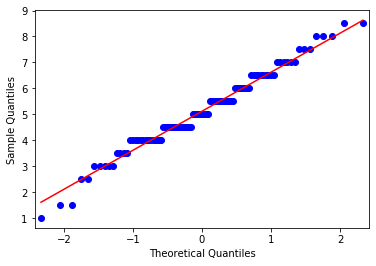

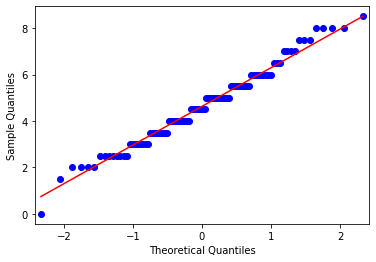

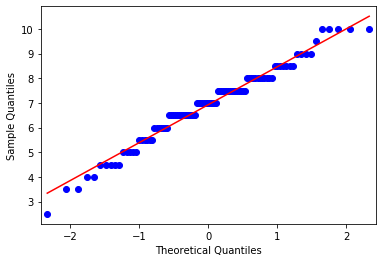

<IPython.core.display.Javascript object>

In [9]:
qqplot(audio_book, line="s")
plt.show()

qqplot(music, line="s")
plt.show()

qqplot(control, line="s")
plt.show()

### Variance!

From [`scipy.stats.bartlett` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html):

> Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

* $H_o$: all input samples are from populations with equal variances
* $H_a$: all input samples are not from populations with equal variances

Before we run a formal test, let's show the standard deviation of each group sample.

In [10]:
tall_pain.groupby("treatment").describe()

pain                                           
            count   mean       std  min  25%  50%  75%   max
treatment                                                   
audio_book  100.0  5.115  1.514000  1.0  4.0  5.0  6.0   8.5
control     100.0  6.925  1.546216  2.5  6.0  7.0  8.0  10.0
music       100.0  4.630  1.673652  0.0  3.5  4.5  5.5   8.5

<IPython.core.display.Javascript object>

Now let's run the more formal test.  Note, like Shapiro-Wilk, this test can also be sensitive and Levene's test is sometimes used as an alternative.

In [36]:
_, p = stats.bartlett(audio_book, music, control)
p

0.5714870092484428

<IPython.core.display.Javascript object>

## Is there a difference in level of pain reported between the groups?

We have 3 groups, doing repeated t-tests would be compounding our chance of Type I error.  To combat this, we can use a one-way ANOVA.  For this, we can use `scipy` or `statsmodels`.  Below is how we can do this `scipy`, we'll dig more into `statsmodels` output/options.

In the first cell of the notebook, the data is loaded into distinct variables, this is how `scipy.stats.f_oneway` is expecting the data.

What do we conclude?

* $H_o$: The mean is the same for all groups
* $H_a$: The mean is not the same for all groups (doesn't say what mean(s) is/are different)

In [23]:
f, p = stats.f_oneway(audio_book, music, control)

print(f)
print(p)

58.64673549954447
3.4204361290351056e-22


<IPython.core.display.Javascript object>

For `statsmodels`, we'll use the 'formula syntax' which has the basic form of:

`'y ~ x'` or `'(explain this) ~ (using this)'`

We want to explain pain using treatment as our explanation.  So we want to do something like `'pain ~ treatment'`.  The last piece of the puzzle is how to deal with `'treatment'` being a categorical variable.  To include that info in the formula we use `'C()'`.  So our final formula will be:

`'pain ~ C(treatment)'`

In [24]:
lm = ols("pain ~ C(treatment)", data=tall_pain).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatment),292.611667,2.0,58.646735,3.420436e-22
Residual,740.925000,297.0,NaN,NaN


<IPython.core.display.Javascript object>

With the `statsmodels` output we can revisit the normality assumption in light of the 'residuals'.  We'll discuss more about these when we get to linear regression.  For now we'll just think of them as a different way to check the normality assumption.

Visualize the residuals to inspect normality.

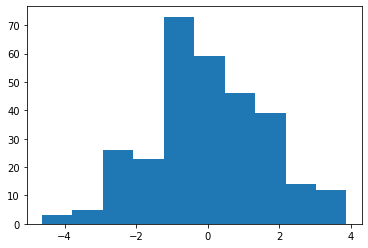

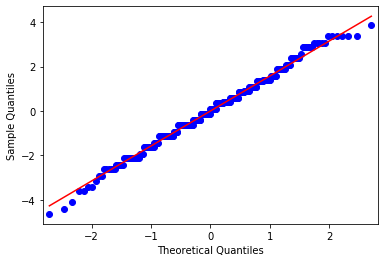

<IPython.core.display.Javascript object>

In [25]:
plt.hist(lm.resid)
plt.show()

qqplot(lm.resid, line="s")
plt.show()

Run a formal test for normality on the residuals.

In [35]:
_, p = stats.shapiro(lm.resid)
p

0.15780609846115112

<IPython.core.display.Javascript object>

Back to our ANOVA hypothesis testing.

There is a significant difference for at least one of our groups' means!

Let's find out which one with ad hoc analysis.  To use the `pairwise_tukeyhsd()` function from `statsmodels` it would be simpler if our data was in long/tall format; currently our data is in a wide format.

group1,group2,meandiff,p-adj,lower,upper,reject
audio_book,control,1.81,0.001,1.2838,2.3362,True
audio_book,music,-0.485,0.0779,-1.0112,0.0412,False
control,music,-2.295,0.001,-2.8212,-1.7688,True


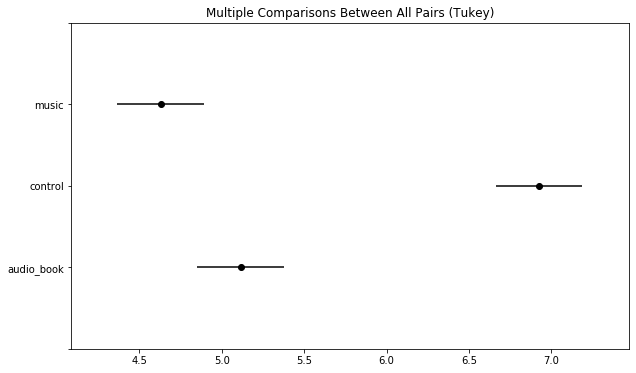

<IPython.core.display.Javascript object>

In [34]:
tukey_results = pairwise_tukeyhsd(
    endog=tall_pain["pain"], groups=tall_pain["treatment"], alpha=0.05
)

display(tukey_results.summary())

tukey_results.plot_simultaneous()
plt.show()

Our results show that the control group reported pain at a significantly higher level than both of our audio groups.  There was no difference found between the 2 audio groups.

## Switch up the Set up

Let's now say that instead of having three separate groups we only have one group of patients.  We played our subjects an audio book during a painful procedure, later we did the same painful procedure and played them nothing (our control).

We do not have independent samples in this case, so we should not use our `ttest_ind` test that assumes independence.  However, like an independent t-test, a paired t-test is still the ratio of $\frac{signal}{noise}$.

#### Our signal

Instead of comparing the difference of the 2 groups means (`mean(x1) - mean(x2)`), we take the difference of each pair's values and then take the mean of this set of differences (`mean(x1 - x2)`). 

#### Our noise

In an independent t-test our noise is a calculated to be a pooled standard error. In a paired t-test since we're just looking at one value as our signal, so we'll use its standard error as the measure of noise.

### Performing paired t-test 'by hand'

In [17]:
paired_pain = pain[["audio_book", "control"]]
paired_pain["diff"] = paired_pain["audio_book"] - paired_pain["control"]
paired_pain.head()

,audio_book,control,diff
0,7.5,6.0,1.5
1,4.0,8.5,-4.5
2,4.0,7.5,-3.5
3,3.0,7.5,-4.5
4,6.5,5.0,1.5


<IPython.core.display.Javascript object>

#### Check normality assumption

Note, similar to an independent t-test, with larger sample sizes this test is robust to deviations from normality.  This robustness is more related to Type I error (i.e. we don't significantly increase risk of a fals positive); with violations of this assumption we might be more at risk of a Type II error (i.e. a false negative).

Assess normality of the differences visually.

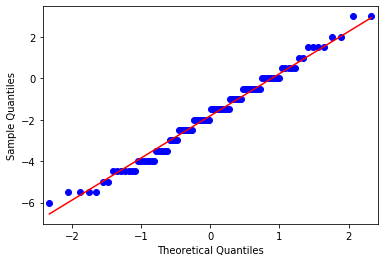

<IPython.core.display.Javascript object>

In [18]:
qqplot(paired_pain["diff"], line="s")
plt.show()

Assess with a more formal test.

In [19]:
_, p = stats.shapiro(paired_pain["diff"])
p

0.2600746154785156

<IPython.core.display.Javascript object>

Now we'll calculate the value of `t` 'by hand'.

$$t = \frac{signal}{noise}$$

Where

$$signal = \bar{d}$$
$$noise = \frac{s_d}{\sqrt{n_d}}$$

And $d$ represents the differences between the paired samples.

In [20]:
signal = paired_pain["diff"].mean()
noise = paired_pain["diff"].std() / np.sqrt(len(paired_pain["diff"]))

test_statistic = signal / noise
test_statistic

-8.852250711058128

<IPython.core.display.Javascript object>

In general, that's a pretty large value of $t$.  If using our handy 1.96 we would reject the null.  In practice, it's nicer to use a prewritten function that will find $p$ for us and we can just interpret that.

### Using `scipy.stats`

In [33]:
t, p = stats.ttest_rel(paired_pain["audio_book"], paired_pain["control"])

print(t)
p

-8.852250711058128


3.470797478255681e-14

<IPython.core.display.Javascript object>

### Confidence interval

Like the independent t-test, our CI formula is:

$$signal \pm scalar * noise$$

Where the $scalar$ will be a critical value related to our level of confidence.  In our examples, we've been sticking with 1.96, but this could be looked up more formally with `scipy.stats.t.ppf`.

In [29]:
(signal - 1.96 * noise, signal + 1.96 * noise)

(-2.2107568375315423, -1.409243162468458)

<IPython.core.display.Javascript object>

In [32]:
confidence = 0.95
cv = abs(stats.t.ppf((1 - confidence) / 2, paired_pain.shape[0] - 1))

print(cv)
(signal - cv * noise, signal + cv * noise)

1.9842169515086827


(-2.215708423705662, -1.4042915762943384)

<IPython.core.display.Javascript object>